<a href="https://colab.research.google.com/github/Daniel-Stojanovski/VNP/blob/master/Laboratoriska_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font  color='Orange'>Data Preparation & KNN Classification</font>


# <font color = 'Orange'> Read your Dataset (.csv)</font>
run the code below for downloading the dataset

In [1]:
!gdown 1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS

Downloading...
From: https://drive.google.com/uc?id=1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS
To: /content/diabetes.csv
100% 23.8k/23.8k [00:00<00:00, 41.4MB/s]


In [2]:
import pandas as pd

df = pd.read_csv('/content/diabetes.csv')

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# <font color = 'Orange'> Data preprocessing </font>

Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Input columns: Pregnancies, Glucose, BloodPressure,SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

Output columns: Outcome 0-->doesn't have diabetes / 1--> has diabetes

## <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset.

Прво стави цели множества за тренинг и тестирање.

In [73]:
train_df = pd.read_csv('/content/diabetes.csv')
test_df = pd.read_csv('/content/diabetes.csv')

Означи го секој ред со тренинг или тест тип

In [10]:
train_df['df_type'] = 'train'
test_df['df_type'] = 'test'

In [11]:
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,df_type
0,6.0,148,72,35.0,0,33.6,0.627,50,1,train
1,1.0,85,66,29.0,0,26.6,0.351,31,0,train
2,8.0,183,64,0.0,0,23.3,0.672,32,1,train
3,1.0,89,66,23.0,94,28.1,0.167,21,0,train
4,0.0,137,40,35.0,168,43.1,2.288,33,1,train


Ги спојуваме тренинг и тест табелите

In [12]:
df = pd.concat([train_df, test_df])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,df_type
0,6.0,148,72,35.0,0,33.6,0.627,50,1,train
1,1.0,85,66,29.0,0,26.6,0.351,31,0,train
2,8.0,183,64,0.0,0,23.3,0.672,32,1,train
3,1.0,89,66,23.0,94,28.1,0.167,21,0,train
4,0.0,137,40,35.0,168,43.1,2.288,33,1,train
...,...,...,...,...,...,...,...,...,...,...
763,10.0,101,76,48.0,180,32.9,0.171,63,0,test
764,2.0,122,70,27.0,0,36.8,0.340,27,0,test
765,5.0,121,72,23.0,112,26.2,0.245,30,0,test
766,1.0,126,60,0.0,0,30.1,0.349,47,1,test


Испринтај хистограми/heatmap за одредени колони, за да се визуелизира распределбата

In [16]:
import seaborn as sns

<Axes: >

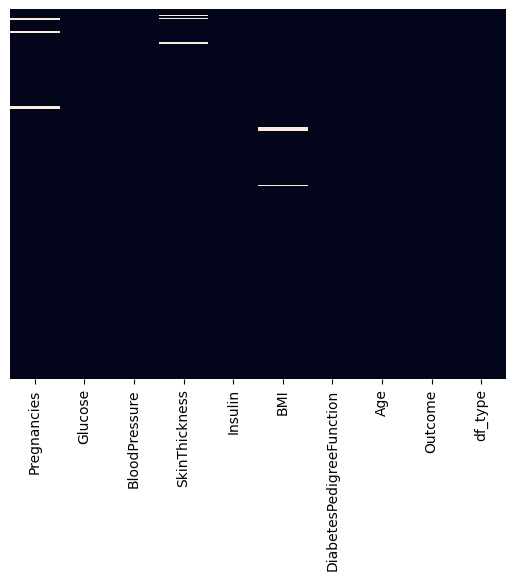

In [26]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False)

или претстави го множестовото со празни вредности како процент од секоја колона

In [24]:
missing_percentage = df.isnull().mean() * 100

print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
Pregnancies                 1.822917
Glucose                     0.000000
BloodPressure               0.000000
SkinThickness               1.041667
Insulin                     0.000000
BMI                         1.302083
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
df_type                     0.000000
dtype: float64


In [33]:
missing_percentage = df.isnull().sum() / len(df) * 100

print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
Pregnancies                 1.822917
Glucose                     0.000000
BloodPressure               0.000000
SkinThickness               1.041667
Insulin                     0.000000
BMI                         1.302083
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
df_type                     0.000000
dtype: float64


## <font color = 'Orange'> Find reasons for the missing values</font>


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

Visualize the missing values using Missingno library

In [54]:
import missingno as msno
import numpy as np

<Axes: >

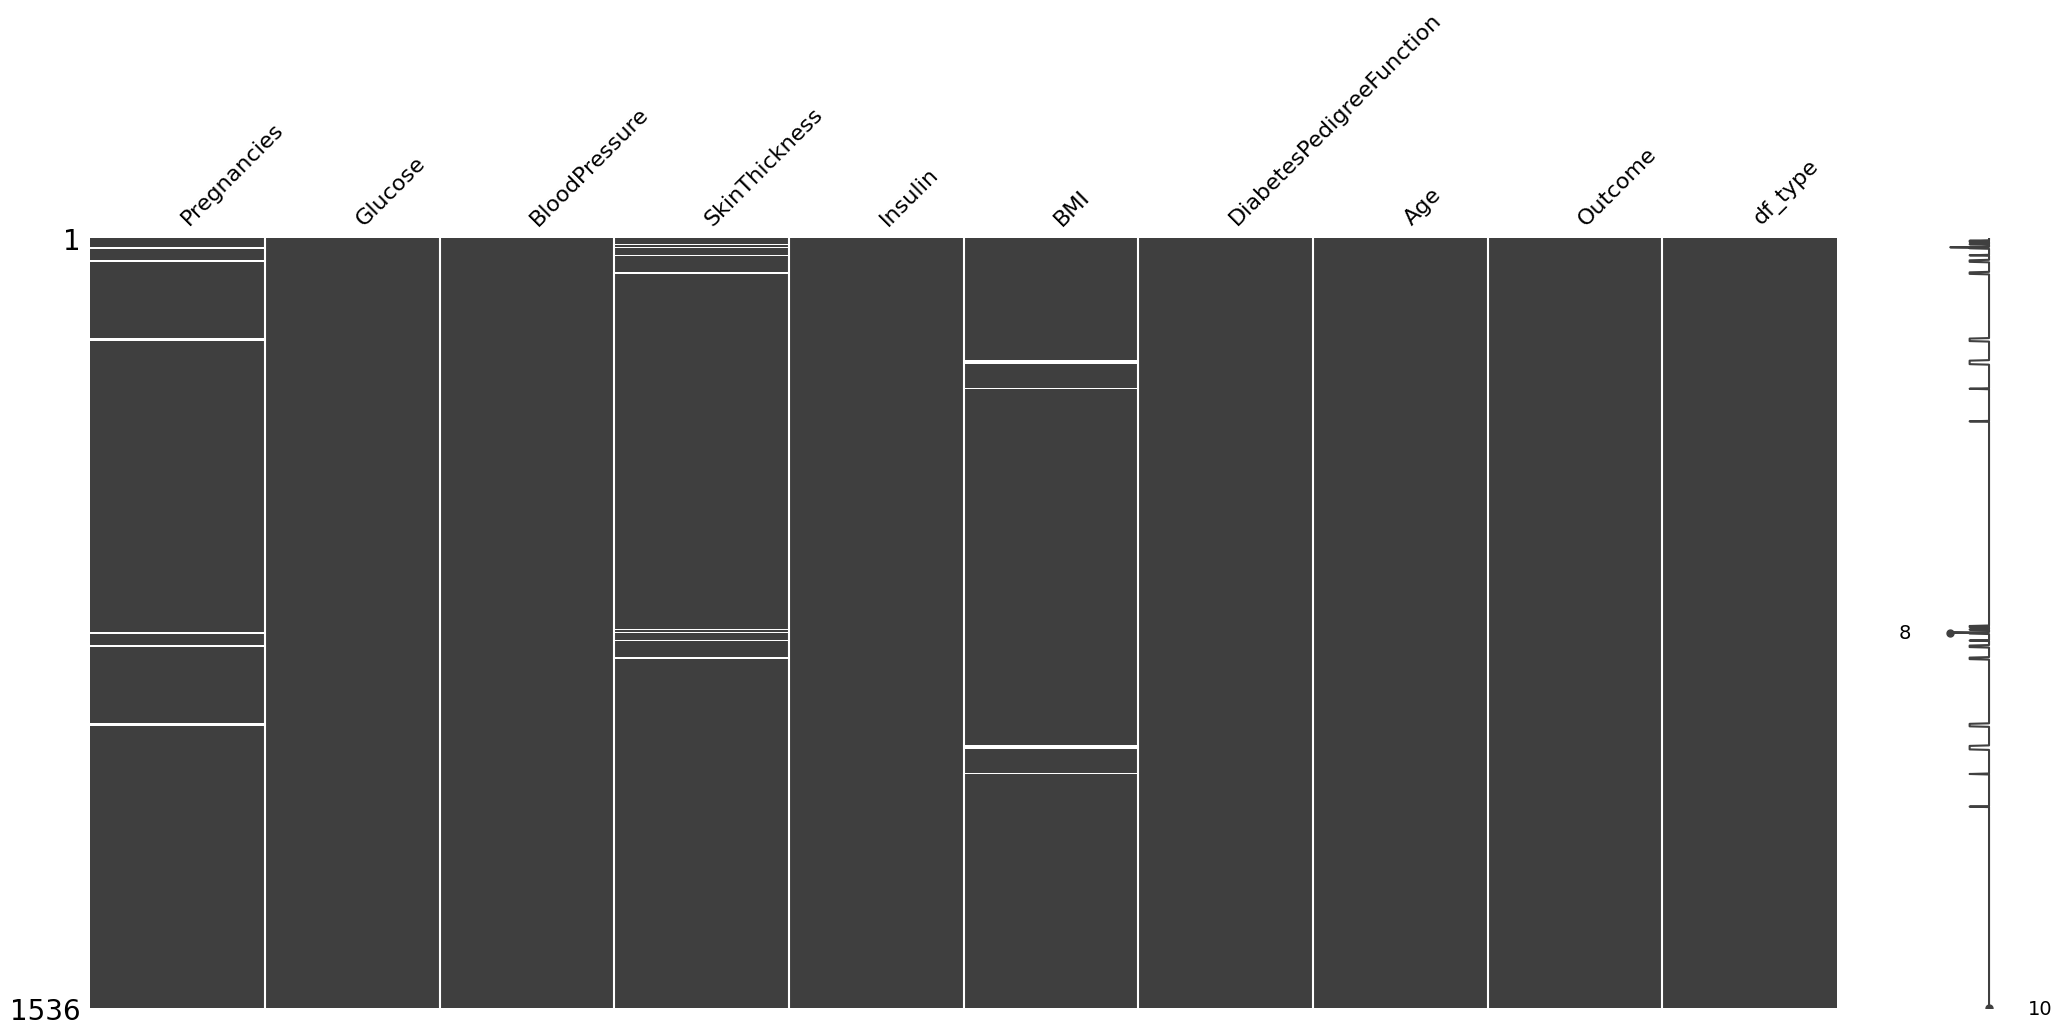

In [28]:
msno.matrix(df)

<Axes: >

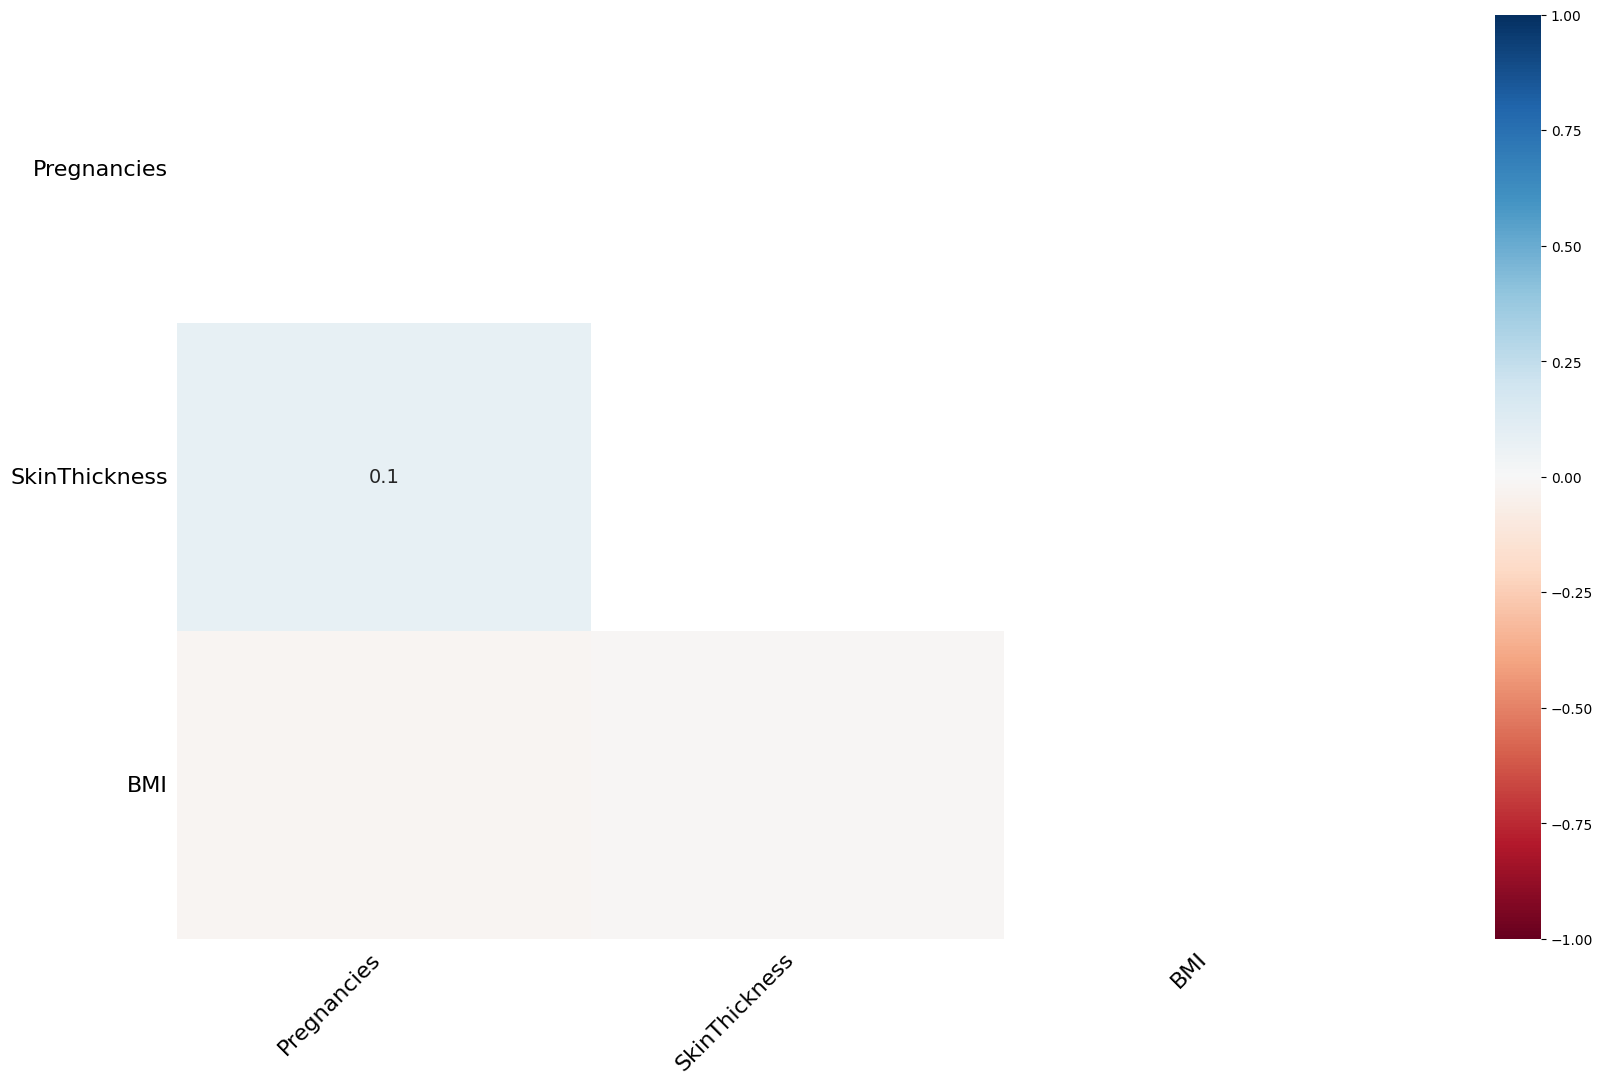

In [37]:
msno.heatmap(df)

<Axes: >

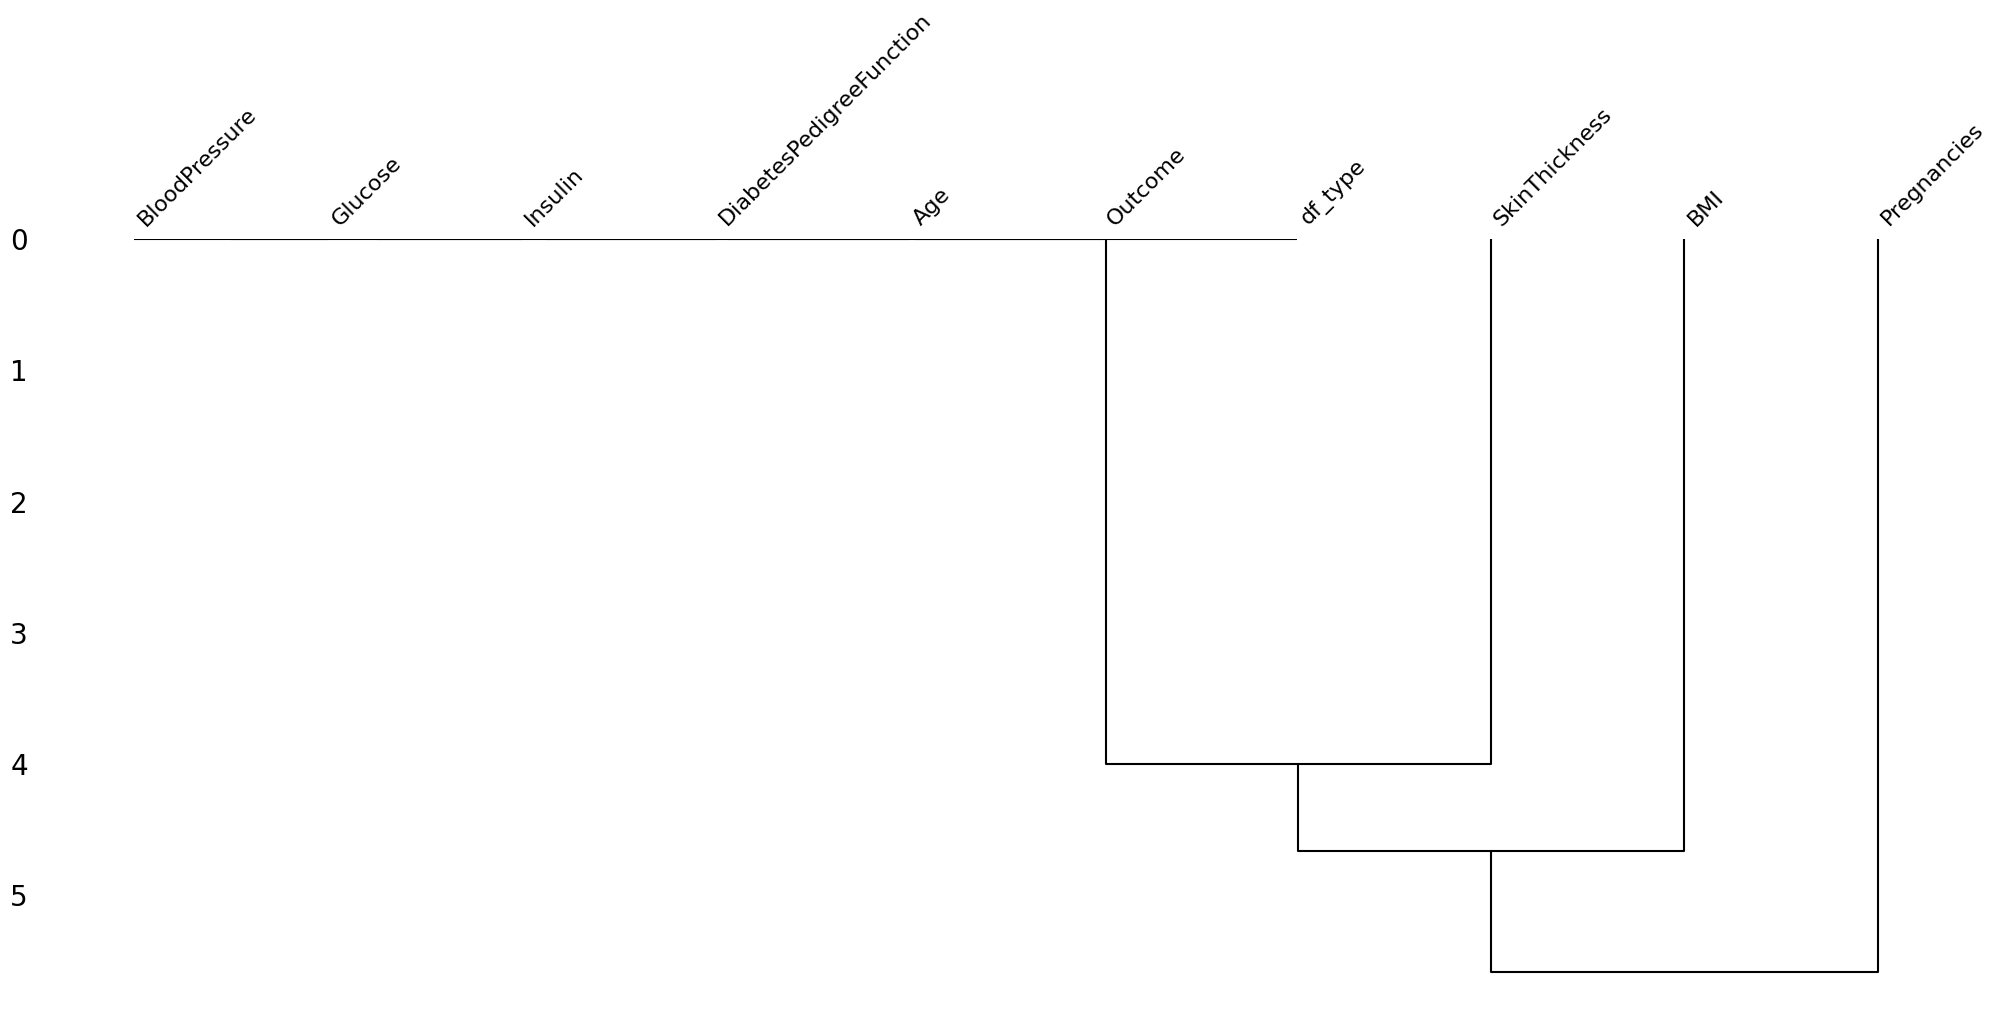

In [31]:
msno.dendrogram(df)

<Axes: >

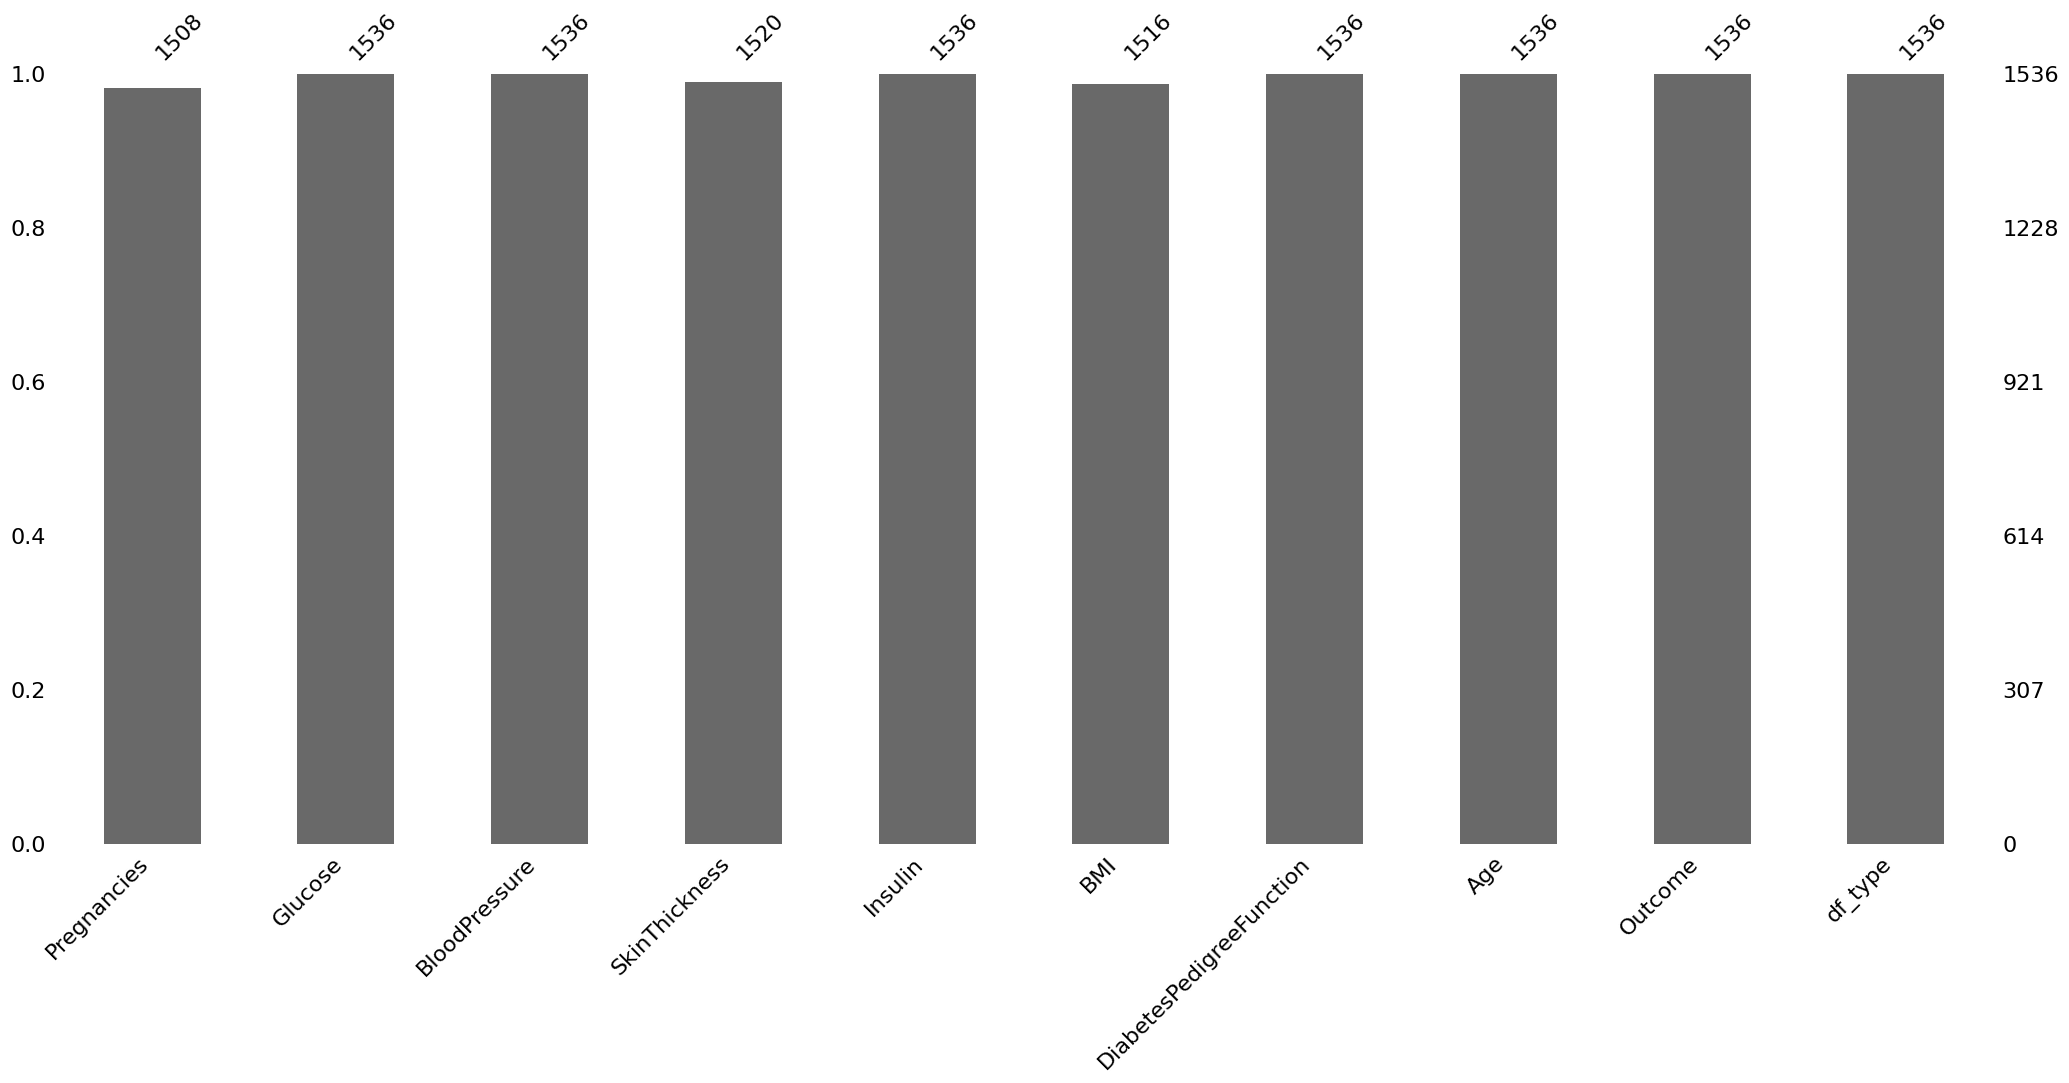

In [36]:
msno.bar(df)

## <font color = 'Orange'>Handle the missing values</font>

<Axes: xlabel='Outcome', ylabel='count'>

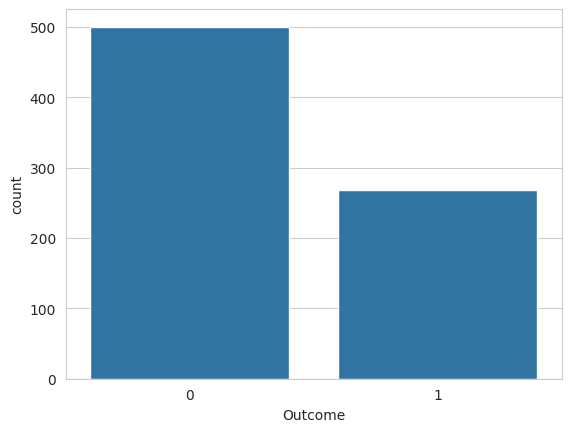

In [38]:
sns.set_style('whitegrid')
sns.countplot(x='Outcome', data=train_df)

<Axes: xlabel='Outcome', ylabel='count'>

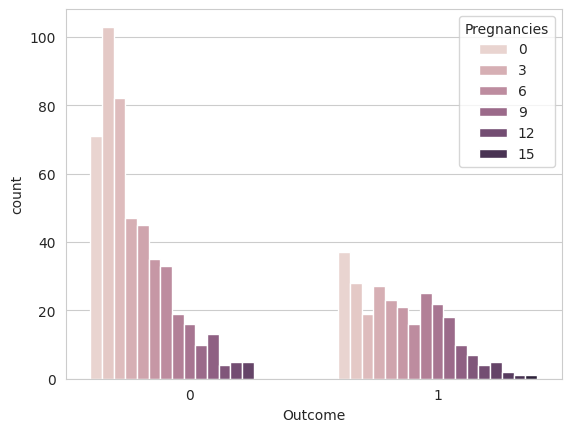

In [39]:
sns.set_style('whitegrid')
sns.countplot(x='Outcome', hue='Pregnancies', data=train_df)

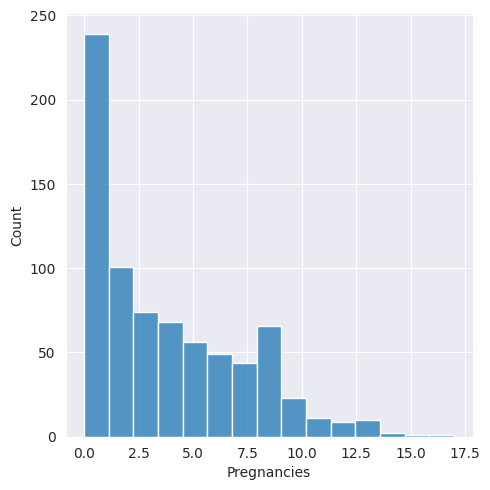

In [51]:
sns.displot(train_df['Pregnancies'].dropna(), kde=False, bins=15)

<Axes: xlabel='Age', ylabel='Pregnancies'>

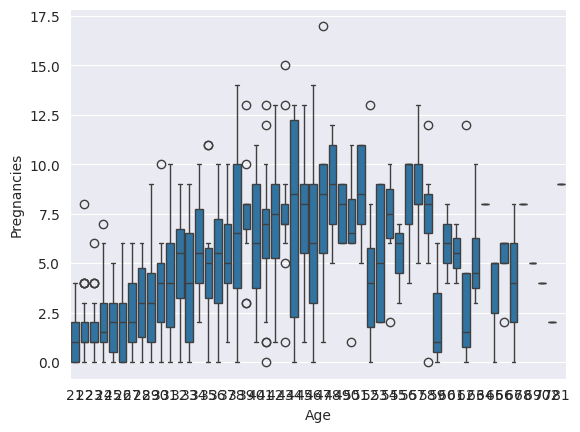

In [65]:
sns.boxplot(x='Age', y='Pregnancies',data=train_df)

In [59]:
train_pd_df = pd.DataFrame(train_df)
train_pd_df = train_pd_df.replace(0, np.nan)
train_log_df = train_pd_df.map(lambda x: np.log(x) if pd.notnull(x) else x)
train_log_df

TypeError: ufunc 'log' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [60]:
lower_limit = train_df.quantile(0.05)
upper_limit = train_df.quantile(0.95)
train_trunc_df = train_df.clip(lower=lower_limit, upper=upper_limit, axis=1)
print('Truncated DataFrame for train_df')
train_trunc_df

TypeError: unsupported operand type(s) for -: 'str' and 'str'

prodolzi ovde


In [82]:
train_df['Pregnancies'] = train_df['Pregnancies'].fillna(train_df['Pregnancies'].mode()[0])
train_df['BMI'] = train_df['BMI'].fillna(train_df['BMI'].mean())
train_df['SkinThickness'] = train_df['SkinThickness'].fillna(train_df['SkinThickness'].median())
train_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50,1
1,1.0,85,66,29.0,0,26.6,0.351,31,0
2,8.0,183,64,0.0,0,23.3,0.672,32,1
3,1.0,89,66,23.0,94,28.1,0.167,21,0
4,0.0,137,40,35.0,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101,76,48.0,180,32.9,0.171,63,0
764,2.0,122,70,27.0,0,36.8,0.340,27,0
765,5.0,121,72,23.0,112,26.2,0.245,30,0
766,1.0,126,60,0.0,0,30.1,0.349,47,1


<Axes: >

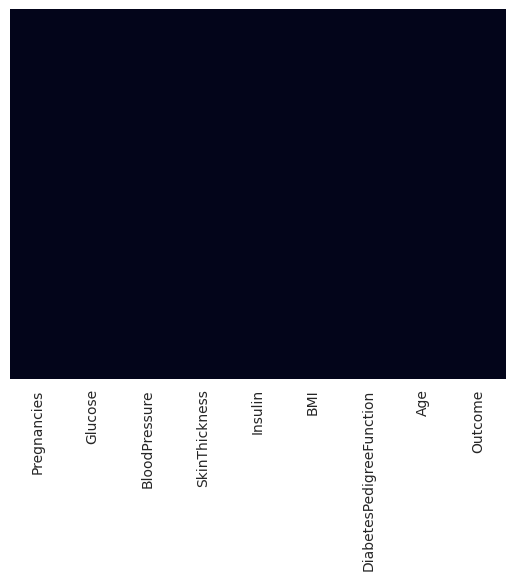

In [83]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False)

## <font color = 'Orange'>Save the new Dataset(.csv) without the missing values</font>

In [85]:
train_df.to_csv("train_dataframe.csv")

Print the first rows of your final Dataset

In [87]:
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50,1
1,1.0,85,66,29.0,0,26.6,0.351,31,0
2,8.0,183,64,0.0,0,23.3,0.672,32,1
3,1.0,89,66,23.0,94,28.1,0.167,21,0
4,0.0,137,40,35.0,168,43.1,2.288,33,1


# <font color='orange'>KNN Classification</font>

##<font color = 'Orange'>Split the dataset for training and testing in ratio 80:20 </font>


In [ ]:
#add your code

## <font color = 'Orange'>Initialize the KNN Classification model, and use the fit function for training the model</font>

In [ ]:
#add your code

## <font color = 'Orange'>Predict the outcomes for X test</font>

In [ ]:
#add your code

## <font color = 'Orange'>See the model performance, by using sklearn metrics for classification</font>



In [ ]:
#add your code